In [ ]:
#1. Load the dataset and explore the variables.

In [1]:
!pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("customer_churn.csv")
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.value_counts(dropna=False)

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines     InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges  Churn
0002-ORFBO  Female  0              Yes      Yes         9       Yes           No                DSL              No                   Yes                  No                   Yes                  Yes                  No                   One year        Yes               Mailed check               65.60           593.3         No       1
6616-AALSR  Female  0              Yes      Yes         65      Yes           Yes               Fiber optic      Yes                  No                   Yes                  No                   Yes                  Yes                  Two year        Yes               Credit card (automatic)    104.30          6725.3 

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [7]:
df['Churn'].value_counts(dropna=False)

No     5174
Yes    1869
Name: Churn, dtype: int64

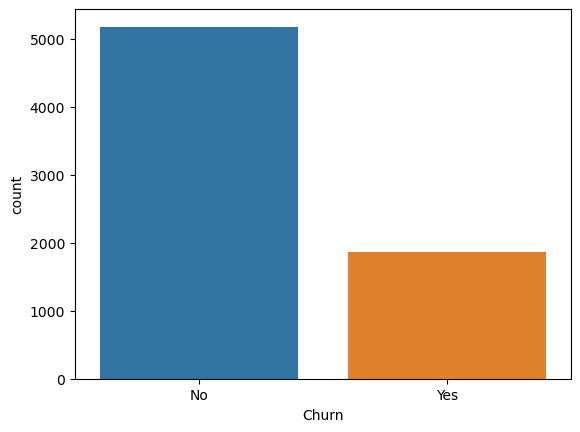

In [8]:
sns.countplot(x='Churn', data=df);
plt.show()

In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [35]:
X = df.drop(['customerID', 'gender', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', "TotalCharges", 'Churn'], axis = 1)
y = df['Churn']

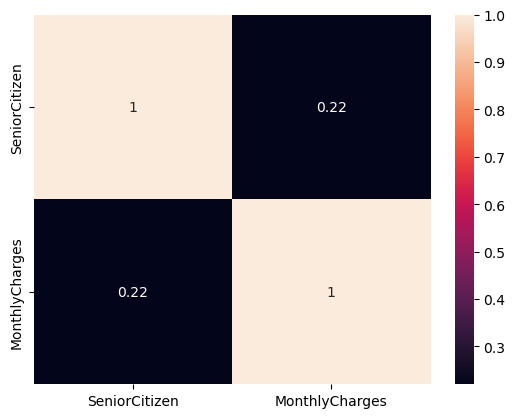

In [36]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [38]:
y_train.isna().sum()
y_test.isna().sum()

0

In [39]:
transformer = StandardScaler()
transformer.fit(X_train)

X_train_scaled_np = transformer.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)

X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,SeniorCitizen,MonthlyCharges
3296,-0.435476,-0.514314
6397,2.296336,0.017840
6043,-0.435476,-0.819594
5309,-0.435476,-1.483535
3000,-0.435476,0.658427


In [40]:
X_test_scaled.head()

,SeniorCitizen,MonthlyCharges
2200,-0.435476,-0.217375
4627,-0.435476,1.731076
3225,-0.435476,0.241378
2828,-0.435476,-1.476862
3768,-0.435476,0.434889


In [41]:
y_train.head()

3296     No
6397     No
6043    Yes
5309     No
3000    Yes
Name: Churn, dtype: object

In [42]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [44]:
lr.predict_proba(X_train_scaled)

array([[0.80058115, 0.19941885],
       [0.62787574, 0.37212426],
       [0.81994241, 0.18005759],
       ...,
       [0.85608684, 0.14391316],
       [0.61328317, 0.38671683],
       [0.85667974, 0.14332026]])

In [45]:
lr.predict_proba(X_train_scaled)[0,0] + lr.predict_proba(X_train_scaled)[0,1]

1.0

In [46]:
lr.predict_proba(X_train_scaled).sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [47]:
lr.predict(X_train_scaled)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [48]:
logits = np.log(lr.predict_proba(X_train_scaled)[:,1]/(1-lr.predict_proba(X_train_scaled)[:,1]))

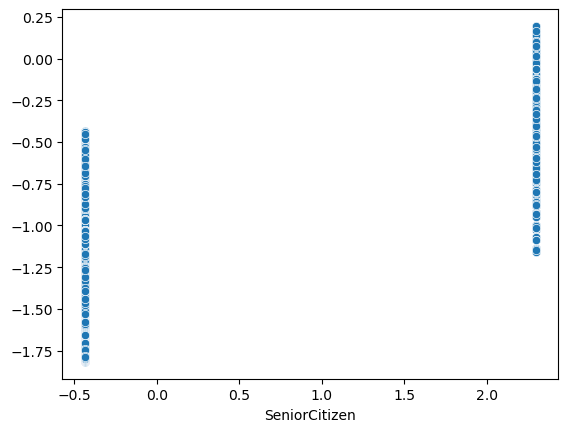

In [49]:
sns.scatterplot(y = logits, x = X_train_scaled['SeniorCitizen']);
plt.show()

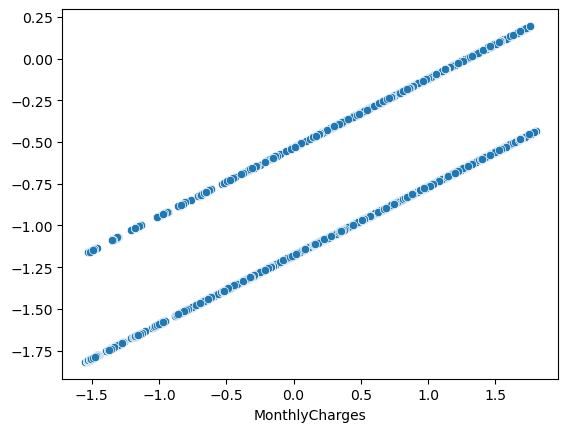

In [50]:
sns.scatterplot(y = logits, x = X_train_scaled['MonthlyCharges']);
plt.show()

No     5174
Yes    1869
Name: Churn, dtype: int64


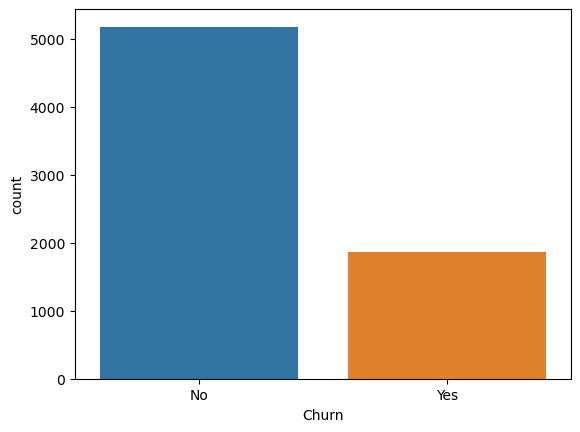

In [51]:
count_classes = df['Churn'].value_counts()
print(count_classes)
sns.countplot(x = 'Churn', data = df);
plt.show()

In [52]:
print("The class imbalance ratio is: {:.2f}".format((count_classes[0]-count_classes[1])/(count_classes[0]+count_classes[1])))

The class imbalance ratio is: 0.47


In [53]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)
print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_scaled, y_test)))

The accuracy of the model in the TEST set is: 0.73


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))

#GOT AN ERROR MESSAGE WHEN I TRIED TO CALCULATE THE OTHER ONES- "VALUEERROR: POS_LABEL=1 IS NOT A VALID LABEL 

The accuracy in the TEST set is: 0.73


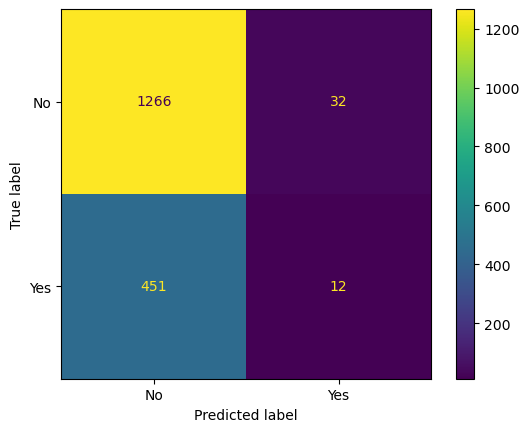

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [ ]:
#7. Even a simple model will give us more than 70% accuracy. Why?


In [ ]:
#8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
sm = SMOTE(random_state=100,k_neighbors=3)

X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [59]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(5282, 2)
(7752, 2)


In [60]:
y_train_SMOTE.value_counts()

No     3876
Yes    3876
Name: Churn, dtype: int64

In [62]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
#GOT THE SAME VALUEERROR MESSAGE AS ABOVE 

The accuracy in the TEST set is: 0.58


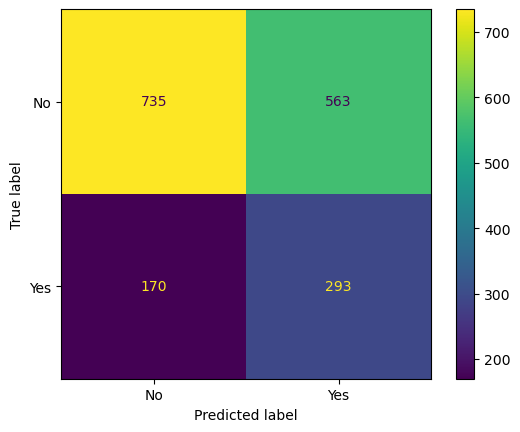

In [63]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [ ]:
#There is no improvement, there is a decline in the accuracy of the model, falling from a 0.73 accuracy score to a 0.58 